In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit, SubCircuit
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Unit import *

import numpy as np
import matplotlib.pyplot as plt

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

2022-01-01 09:52:53,528 - PySpice.Doc.ExampleTools - ExampleTools.INFO - SPICE library path is /opt/anaconda3/lib/python3.8/libraries
2022-01-01 09:52:53,536 - PySpice.Spice.Library.Library - Library.WARNING - Problem parsing /opt/anaconda3/lib/python3.8/libraries/libraries/TLC372.lib - '\x1a'
2022-01-01 09:52:53,603 - PySpice.Spice.Library.Library - Library.WARNING - Problem parsing /opt/anaconda3/lib/python3.8/libraries/spice-parser/kicad-spice-example/kicad-spice-example-rescue.lib - '#'
2022-01-01 09:52:53,605 - PySpice.Spice.Library.Library - Library.WARNING - Problem parsing /opt/anaconda3/lib/python3.8/libraries/spice-parser/kicad-spice-example/kicad-spice-example-cache.lib - '#'
2022-01-01 09:52:53,612 - PySpice.Spice.Library.Library - Library.WARNING - Problem parsing /opt/anaconda3/lib/python3.8/libraries/spice-parser/kicad-pyspice-example/kicad-pyspice-example-rescue.lib - '#'
2022-01-01 09:52:53,614 - PySpice.Spice.Library.Library - Library.WARNING - Problem parsing /opt/an

Note that access to components like Zener diode required a post-installation step.
1. Check the 'libraries_path' in the set-up above. 
2. Execute at terminal prompt the following: ```pyspice-post-installation --download-example```.
3. Give it the path in 1, e.g. '/opt/anaconda3/lib/python3.8/libraries' when prompted for location to extract examples.

Now, ```SpiceLibrary``` has the components like Zener diode.

# FOUNDATIONS

## INTRODUCTION

Did you know that the panel controls and cabinet hardware of an instrument may cost more than the electronics inside? The Art of Electronics equips readers to construct powerful, elegant, yet inexpensive, little gadgets to do almost any conceivable task. It keeps mathematics to a minimum to foster a good intuitive understanding of circuit design and behavior. On this foundation, build *active circuits* with amplifiers, oscillators, logic circuits, etc.

## VOLTAGE, CURRENT AND RESISTANCE

*Voltage and current*

The two quantities that we want to keep track of in electronic circuits are voltage and current. These are usually time-varying, which is an indicator of electricity being harnessed to perform useful and interesting tasks.

Moving a mass uphill requires energy and downhill movement releases energy that can be harnessed to get work done. In general, uphill is the direction from a point of lower potential to a point of higher potential. In an electrical circuit, voltage represents potential. It is usually represented by the symbol 'V' with unit of measure being volts.

Think of an electrical circuit as an obstacle track for electrical charge. The flow of electrical charge is current. It is usually represented by the symbol 'I' with unit of measure being amperes. The charge itself has unit of measure coulomb. Being the rate of flow, current is coulombs per second and usually expressed in amperes.

By the nature of these entities, voltage is always *across* two points and current is *at* a point. When we refer to voltage *at a point* in a circuit, we implicitly refer to the second point as the *datum* or ground.

The physical realization of a circuit has electrical components that are connected together by wires made of metallic conductors. Any continuous length of wire has the same voltage anywhere on it with respect to, say, ground. This may not be strictly true but is a good approximation.

The engineering drawing of a circuit may not look anything like the physical circuit because wires can be rearranged. It is helpful to think of a circuit as a network graph with junctions as nodes and electrical components as edges. This is the format in which we present a circuit to simulation software.

There are some simple rules about voltage and current. Imagine going for a walk and returning to the starting point. Some sections of the walk may be uphill and others downhill. Having returned to the starting poing, the sum of all the *ups* and *downs* is exactly zero! So also, **the sum of t he voltage drops in any closed circuit is zero**. This is *Kirchoff's voltage law*.

Likewise, *Kirchoff's current law* states that **the sum of currents into a point in a circuit equals the sum of currents out**. This is the law of conservation of charge. These two laws help describe a DC circuit (with a DC voltage source, like a battery) in mathematical equations for circuit analysis, to know the voltage or current at a probe point.

Components connected in parallel (**Fig 1.1**) must have the same voltage across them. Can you see how this follows from Kirchoff's laws?

![Figure 1.1](Assets/AoE_1_1.png)

Circle back to the discussion about energy release going downhill. The energy must be dissipated somehow. Think about lightning, which is electrical charge discharged from clouds. High potential is generated by friction between clouds and builds up until the difference in potential with ground (literally!) breaks down the resistance of the atmosphere. The energy is dissipated as a pressure wave that we hear as a loud thunderclap. Enough energy may remain to damage trees and property and cause bodily harm. 

In an electrical circuit, we dissipate energy safely and in a controlled manner to get work done by a machine. The simplest way to do that is using a resistor. As the name suggests, a resistor provides resistance to the flow of current so that energy is dissipated as heat. How much power do we need to dissipate? The power, P, work per unit time, is product of the voltage, V, work per unit charge, and current, I, charge per unit time.

$$
P = VI
$$

Seen in this way, resistance may seem like a nuisance, but so is friction and without it we wouldn't even be able to walk! Resistors are available in a variety (**Fig 1.2**).

![Figure 1.2](Assets/AoE_1_2.png)

Power may go into mechanical work (motors), radiated energy (lamps, radio transmitters), or stored energy (batteries, capacitor). We can harness energy in many ways with an electrical cicruit. The name of the game is always to get the desired I-versus-V characteristics. The basic building blocks are resistors (I simply proportional to V), capacitors (I proportional to the rate of change of V), inductors (V proportional to the rate of change of I), diodes (I flows in only one direction), thermisters (temperature-dependent resistor), photoresistors (light-dependent resistor), strain gauges (strain-dependent resistor) and more exotic devices. The resistor is a good place to start.

*Relationship between voltage and current: resistors*

The characteristic equation of a resistor (**Fig 1.3**) is as follows:

$$
R = V/I
$$

In a circuit, a resistor is shown like so:

![Fig 1.3](Assets/AoE_1_3.png)

The current (*I*) is proportional to the voltage (*V*) and vice-versa. The resistance (*R*) is the constant of proportionality in this linear relationship between V and I. 

Resistors in a series (**Fig 1.4**) add up. 

$$
    R = R_{1} + R_{2}
$$

The resistance to two resistors in parallel (**Fig 1.5**) is as follows:

$$
\frac{1}{R} = \frac{1}{R_{1}} + \frac{1}{R_{2}}
$$
$$
R = \frac{R_{1}R_{2}}{R_{1} + R_{2}}
$$

![Figs 1.4, 1.5](Assets/AoE_1_4_1_5.png)

Extend both formulae to any number of resistors. For example, for the combination in parallel, the formula is as follows:
$$
R = \frac{1}{\frac{1}{R_{1}} + \frac{1}{R_{2}} + \frac{1}{R_{3}} + ...}
$$

The power dissipated by a resistor (or any other device) is as follows:
$$
P = VI
$$
This works out to the following equation for the power dissipation:
$$
P = I^{2}R = \frac{V^{2}}{R}
$$

Think of a circuit as a device that applies energy to work. For this conversion, the circuit accepts an *input* voltage and produces and *output* voltage across a *load* where the work is done. The relationship between the output and input voltages is referred to as *transfer function* and designated by **H**. For example, an audio amplifier produces a time-varying output that is 100 times as large as the similarly time-varying input applied. The audio amplifier's transfer function is simply a constant (i.e $H = 100$ ) 

With just resistors, one circuit that comes in handy is the **voltage divider**. Let's look at that next and examine with a simulation.

*Voltage dividers*

The voltage divider (**Fig 1.6**) is a circuit that, given a certain voltage input, produces a predictable fraction of the input voltage at the output. 

![Fig 1.6](Assets/AoE_1_6.png)

Applying the definition of resistance and the series law, we arrive at the characteristic equation of the voltage divider as follows:

$$
I = \frac{V_{in}}{R_{1} + R_{2}}
$$

Then, we arrive at the transfer function as follows:

$$
V_{out} = IR_{2} = \frac{R_{2}}{R_{1} + R_{2}} V_{in}
$$

An adjustable voltage divider can be made like so:

![Fig 1.7](Assets/AoE_1_7.png)

Such a configuration with a variable resistor ($R_{2}$) gives the classic *volume control* where a knob adjusts the volume. A variable resistor is referred to as *potentiometer* (**Fig 1.8**).

![Fig 1.7](Assets/AoE_1_8.png)



**Simulation: Voltage Divider**

Simulate the circuit shown in **Fig 1.6** with $R_{1} = 10 k\Omega$ and $R_{2} = 10 k\Omega$. We'll use a source $V_{in} = 15 V$.

In [2]:
VoltageDivider = Circuit("VOLTAGE DIVIDER")
VoltageDivider.V('Vin', 'input', VoltageDivider.gnd, 15@u_V)
VoltageDivider.R('R1', 'input', 'output', 10@u_kOhm)
VoltageDivider.R('R2', 'output', VoltageDivider.gnd, 10@u_kOhm)

print(VoltageDivider)

.title VOLTAGE DIVIDER
VVin input 0 15V
RR1 input output 10kOhm
RR2 output 0 10kOhm



In [3]:
VDsim = VoltageDivider.simulator(temperature=25, nominal_temperature=25, \
    simulator='ngspice-shared')
results = VDsim.operating_point()

2022-01-01 09:52:53,817 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Unsupported Ngspice version 35


In [4]:
print("Got Vin as {} and Vout as {}".format(float(results['input']), \
    format(float(results["output"]))))

Got Vin as 15.0 and Vout as 7.5


It is worth noting that the output is in the *no load* condition and application of load will change the gain.

*Voltage and current sources*

The voltage source may be one of two kinds. A Direct Current (DC) source supplies a constant voltage. An Alternating Current (AC) source supplies a cyclically time-varying voltage. In the voltage divider, we used a DC source. An example of such a source is a battery, which is the natural choice for gadgets where portability is a key design consideration. 

However, the transmission and distribution of power from the utility co. is in AC form. Remember the equation for power?
$$
P = VI = I^{2}R
$$
Distribution of power over cables implies loss due to the electrical resistance of the conductor. One way to reduce the loss is to lower R which means using thicker cables. This approach quickly hits a limit as it implies higher cost and weight of cables. What if we could transmit the same power but with much higher voltage and much lower current? Say, increase the voltage by a factor of 1000 while the current becomes 1000 times smaller?

This is possible only with AC current, using a device called *transformer*. Metal cables can easily withstand the high voltages and with proper insulation, high-voltage power lines are a safe and efficient way to transmit electrical power. The power must be *stepped down* by the time it reaches homes or factories, to the standard outlet voltage (110 volts or 240 volts), usually in several steps.

The story of AC-DC is the story of a tussle between two innovative minds of the 19th century, Thomas Edison and Nikola Tesla. Tesla introduced a plethora innovations to propel AC technology to prominence. Edison (and the company he helped start, General ELectric,) favored DC technology. As the merits of AC became self-evident, Edison is said to have launched a smear campaign to cast a pall and shift public sentiment. He famously electrocuted an elephant, Topsy, in New York to show the "dangers" of AC. However, the campaign didn't work and AC won out in the [war of the currents](https://www.energy.gov/articles/war-currents-ac-vs-dc-power).

![Figs 1_9, 1_10](Assets/AoE_1_9_1_10.png)

**With electric vehicles emerging as the poster child of the battery-powered revolution, another Tesla may may reignite the war!**

![ITried2WarnYou](Assets/ITried2WarnYou.gif)

Not all resistor circuits can be resolved into combinations of resistors in series and in parallel. A classic example is a cube made of 12 resistors as follows:

![Thevenin](Assets/Thevenin.gif) 

This circuit **cannot be resolved** into combinations of resistors in series and in parallel in the conventional way. What is a general approach to evaluate the resistance between A and B?



**SIMULATION: RESISTOR NETWORK**

Let us approach this problem with simulation. Create the netlist and calculate the current from the three branches that sink current into A. Calculate the current in each branch from the voltage difference based on simulation results and then sum over the branches. Then use Ohm's law to calculate the net resistance is V/I. Compare with the expected result from theory.

![Thevenin2](Assets/Thevenin2.gif) 

In [5]:
CubeDC = Circuit("DC CUBE")
CubeDC.V('Vin', 'B', 'A', 10@u_V)
CubeDC.R('R01', 'B', 'B1', 100@u_Ohm)
CubeDC.R('R02', 'B', 'B2', 100@u_Ohm)
CubeDC.R('R03', 'B', 'B3', 100@u_Ohm)
CubeDC.R('R04', 'B1', 'A1', 100@u_Ohm)
CubeDC.R('R05', 'B1', 'A3', 100@u_Ohm)
CubeDC.R('R06', 'B2', 'A1', 100@u_Ohm)
CubeDC.R('R07', 'B2', 'A2', 100@u_Ohm)
CubeDC.R('R08', 'B3', 'A2', 100@u_Ohm)
CubeDC.R('R09', 'B3', 'A3', 100@u_Ohm)
CubeDC.R('R10', 'A1', 'A', 100@u_Ohm)
CubeDC.R('R11', 'A2', 'A', 100@u_Ohm)
CubeDC.R('R12', 'A3', 'A', 100@u_Ohm)
print(CubeDC)


.title DC CUBE
VVin B A 10V
RR01 B B1 100Ohm
RR02 B B2 100Ohm
RR03 B B3 100Ohm
RR04 B1 A1 100Ohm
RR05 B1 A3 100Ohm
RR06 B2 A1 100Ohm
RR07 B2 A2 100Ohm
RR08 B3 A2 100Ohm
RR09 B3 A3 100Ohm
RR10 A1 A 100Ohm
RR11 A2 A 100Ohm
RR12 A3 A 100Ohm



In [6]:
sim = CubeDC.simulator(temperature=25, nominal_temperature=25)
res = sim.operating_point()
for name, data in res.nodes.items():
    print("{}: {}".format(name, np.array(data)), end = "; ")

a2: [-3.2]; a3: [-3.2]; a1: [-3.2]; b3: [-1.2]; b2: [-1.2]; b1: [-1.2]; a: [-7.2]; b: [2.8]; 

In [7]:
ATeam = ['a1', 'a2', 'a3']
iout = sum([(float(res[node]) - float(res['a']))/100 for node in ATeam])
print("The current out of the cube is {:.2f} amps, summing over branches sinking to A.".format(iout))
print("This makes {:.2f} ohms the cube resistance by V/I.".format(10.0/iout))
print("Expected {:.2f} from 5/6 x 100 ohms.".format(500/6))




The current out of the cube is 0.12 amps, summing over branches sinking to A.
This makes 83.33 ohms the cube resistance by V/I.
Expected 83.33 from 5/6 x 100 ohms.


*Thevenin's equivalent circuit*

This case for a general approach to cicruit analysis makes a segue into **Thevenin's equivalent circuit**. Thevenin's theorem states that any two-terminal network of resistors and voltage source is equivaent to a circuit with a single resistor R in series with a single voltage source V.

![Fig 1.11](Assets/AoE_1_11.png)

This is remarkable! It means that any mess of batteries and resistors can be mimicked with one battery and one resistor (**Fig 1.11**). How to figure out the Thevenin equivalent voltage $V_{TH}$ and resistance $R_{TH}$? 

$$
V_{TH} = V\ (open\;circuit)
$$
$$
R_{TH} = \frac{V\ (open\;circuit)}{I\ (short\;circuit)}
$$

Let's reexamine the voltage divider and apply Thevenin's theorem (**Fig 1.12**).

![Fig 1.12](Assets/AoE_1_12.png)

The open-circuit voltage is as follows:
$$
V=V_{in}\frac{R_{2}}{R_{1}+R_{2}}
$$
The short-circuit current is as follows:
$$
I=\frac{V_{in}}{R_{1}}
$$
Thus, we arrive at Thevenin's equivalent voltage and resistance (**Fig 1.13**) as follows:
$$
V_{TH}=V_{in}\frac{R_{2}}{R_{1}+R_{2}}
$$
$$
R_{TH}=\frac{R_{1}R_{2}}{R_{1}+R_{2
}}
$$

![Fig 1.13](Assets/AoE_1_13.png)

The voltage divider has a limitation as a power source (**Fig 1.14**), which is that the output voltage drops severely when a load is appled. Let us observe this in simulation.

![Fig 1.14](Assets/AoE_1_14.png)



**SIMULATION: VOLTAGE DIVIDER UNDER LOAD**

Simulate by sweeping through load resistance ($R_{Load}$) with constant voltage source ($V_{in}$) and observe output voltage ($V_{out}$). *Note that the software appears to require at least one sweep through source voltage, so I have applied two levels of source voltage and discarded the second level post simulation.*

In [8]:
VLVD = Circuit("VARIABLE LOAD VOLTAGE DIVIDER")
VLVD.V('Vin', 'input', VLVD.gnd, 15@u_V)
VLVD.R('R1', 'input', 'output', 10@u_kOhm)
VLVD.R('R2', 'output', VLVD.gnd, 10@u_kOhm)
VLVD.R('RLoad', 'output', VLVD.gnd, 10@u_kOhm)

print(VLVD)

.title VARIABLE LOAD VOLTAGE DIVIDER
VVin input 0 15V
RR1 input output 10kOhm
RR2 output 0 10kOhm
RRLoad output 0 10kOhm



In [9]:
"""
The sweep through voltage VVin wasn't part of the plan 
but appears to be necessary as simulation fails without it.
Not to worry, we'll splice it out later.
"""
sim = VLVD.simulator(temperature=25, nominal_temperature=25)
res = sim.dc(VVin = slice(15, 16, 1), RRLoad = slice(0, 100000, 1000))
Vout = np.array(res['output'])

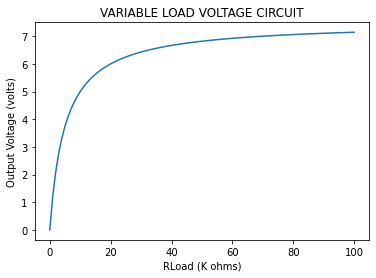

In [10]:
"""
The simulation runs both voltage levels for each value of RLoad.
Splice the array to extract every alternate value starting at index 0.
"""
plt.title("VARIABLE LOAD VOLTAGE CIRCUIT")
plt.xlabel("RLoad (K ohms)")
plt.ylabel("Output Voltage (volts)")
plt.plot(Vout[::2]) # Select only 15 volts
plt.show()

*Here's a conundrum.* Given the output voltage characteristics of a voltage divider just observed, *how high should the load be for optimum power transfer?* The two extremes are: open circuit, zero power; short circuit, zero power. There must be a point between open ciruit (infinitely large load) and short circuit (zero load) where the optimum transfer of power occurs. In the next part, let us use the simulation results to answer this question. 

Note that the theoretical answer is that the load for maximum power transfer is equal to the Thevenin's equivalent resistance of the circuit. This question of optimal power transfer can be generally asked of the Thevenin's equivalent of any circuit.

<ipython-input-11-eda9cf3163db>:28: RuntimeWarning: invalid value encountered in true_divide
  POUT = VOUT**2 / RL


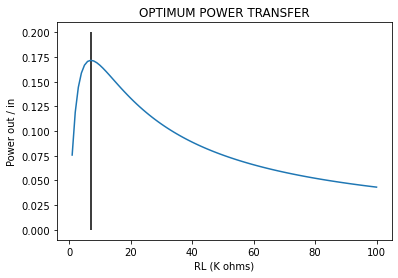

Optimum ratio 0.172 when load is 7000 ohms.
The Thevenin's equivalent resistance suggests an optimum load of 5000 ohms.


In [11]:
"""
Set up the circuit
VIN  (volts) is input voltage, e.g. 15 volts
VOUT (volts) is output from simulation, e.g. fig. above
RL   (ohms) is the varying load, e.g. 0 to 100,000 ohms in steps of 1000 
R1   (ohms) is the resistor, e.g. 10,000 ohms
R2   (ohms) is the resistor in parallel with load, e.g. 10,000 ohms
"""
VOUT = Vout[::2]
VIN = 15
RL = np.linspace(start=0, stop=100000, num=101)
R1 = 10000
R2 = 10000

"""
Calculate the net circuit resistance with RL in parallel with R2 
and the combination in series with R1. Call it R. 
Calculate the Thevenin equivalent resistance. Call it RTH.
The load results in max power transfer when RTH = RL. Let's check.
"""
R = R1 + (R2*RL/(R2 + RL))
RTH = R2*R1/(R2+R1)

"""
Calculate power in and power out and take the ratio. Call it FAC.
"""
PIN = VIN**2 / R
POUT = VOUT**2 / RL
FAC = POUT/PIN
FAC

plt.title("OPTIMUM POWER TRANSFER")
plt.xlabel("RL (K ohms)")
plt.ylabel("Power out / in")
plt.plot(FAC)
plt.vlines(x=7, ymin=0, ymax=0.2)
plt.show()

"""
Note the existence of condition for optimum power transfer. It should occur
at the Thevenin's equivalent voltage and is slightly off. Investigate.
"""
print("Optimum ratio {:.3f} when load is {:.0f} ohms.".format(FAC[7], RL[7]))
print("The Thevenin's equivalent resistance suggests an optimum load of {:.0f} ohms.".format(RTH))



What if we could modify the voltage divider to clamp the output voltage irrespective (within reason) of load? It turns out there is a way to do that, and it involves using a component called Zener diode. Let's look at this next.

We will use a Zener diode to make a voltage source based on voltage divider 'stiff',  i.e. less likely to bend under load. The Zener diode presents unique and interesting V-I characteristics (**Fig 1.15**). Let's observe in simulation.

![Fig 1.15](Assets/AoE_1_15.png)

In [12]:
zen = Circuit("ZENER DIODE DC CURVE")

zen.include(spice_library['1N4148'])
#1N5919B: 5.6 V, 3.0 W Zener Diode Voltage Regulator
zen.include(spice_library['d1n5919brl'])

zen.V('Vin', 'input', zen.gnd, 30@u_V)
zen.R('R', 'input', 'output', 1@u_Ohm)
zen.X('Zener', 'd1n5919brl', 'output', zen.gnd)

print(zen)


.title ZENER DIODE DC CURVE
.include /opt/anaconda3/lib/python3.8/libraries/libraries/diode/switching/1N4148.lib
.include /opt/anaconda3/lib/python3.8/libraries/libraries/diode/zener/1N5919B.lib
VVin input 0 30V
RR input output 1Ohm
XZener output 0 d1n5919brl



In [13]:
zensim = zen.simulator(temperature=25, nominal_temperature=25)
out = zensim.dc(VVin = slice(-10, 2, 0.05))
print("Detected nodes: ")
for node, wave in out.nodes.items():
    print("{}".format(node), end='; ')

Detected nodes: 
xzener.6; xzener.5; xzener.4; xzener.3; output; input; v-sweep; 

The PySpice [docs](https://pyspice.fabrice-salvaire.fr/releases/v1.4/examples/diode/zener-characteristic-curve.html?highlight=zener) suggest reporting the V-I curve like so.

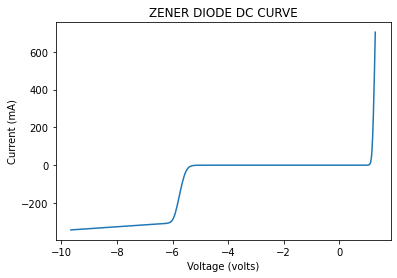

In [14]:
plt.title("ZENER DIODE DC CURVE")
plt.xlabel('Voltage (volts)')
plt.ylabel('Current (mA)')
plt.plot(out.output, -out.VVin*1000)
plt.show()

Here is the V-I curve plotted with current calculation based on the voltage drop across the 1 ohm resistor. It is not clear why the docs have used a scaling factor of 1000 on the Y axis. 

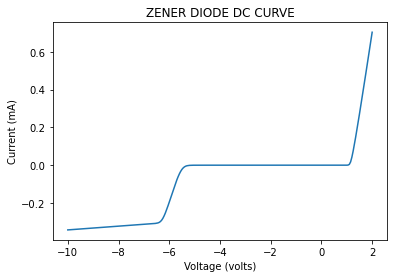

In [15]:
plt.title("ZENER DIODE DC CURVE")
plt.xlabel('Voltage (volts)')
plt.ylabel('Current (mA)') # Based on voltage drop across 1 ohm resistor
plt.plot(out.input, out.input-out.output)
plt.show()

Note the characteristic "knee-bend" in the *forward-bias* region with positive voltage and the *reverse-bias* region with negative voltage. The zener diode is one type of diode among others that have the property of clipping voltage at threshold. A regular diode is used in forward-biased mode as a "one-way street" for current. We shall observe this in a subsequent simulation. A regular diode's behavior in the knee-bend region in reverse-biased configuration is unpredicatable, except in case of zener diode. In fact, zener diode is used primarily in reverse-biased mode for this reason. Let's proceed to see the zener diode in action in voltage divider (**Fig 1.16**).

![Fig 1.16](Assets/AoE_1_16.png)

Note that the device's implementation will reflect its V-I characteristics for use in circuits.

In [16]:
zenr = Circuit("ZENER DIODE VOLTAGE DIVIDER")

zenr.include(spice_library['d1n5919brl'])

zenr.V('Vin', 'input', zenr.gnd, 20@u_V)
zenr.R('R1', 'input', 'output', 300@u_Ohm)
zenr.X('Z', 'd1n5919brl', zenr.gnd, 'output') # reverse-bias
zenr.R('RLoad', 'output', zenr.gnd, 500@u_Ohm)

print(zenr)

# Compare

resr = Circuit("VOLTAGE DIVIDER FOR COMPARISON")

resr.V('Vin', 'input', resr.gnd, 20@u_V)
resr.R('R1', 'input', 'output', 500@u_Ohm)
resr.R('R2', 'output', resr.gnd, 300@u_Ohm)
resr.R('RLoad', 'output', resr.gnd, 500@u_Ohm)

print(resr)

.title ZENER DIODE VOLTAGE DIVIDER
.include /opt/anaconda3/lib/python3.8/libraries/libraries/diode/zener/1N5919B.lib
VVin input 0 20V
RR1 input output 300Ohm
XZ 0 output d1n5919brl
RRLoad output 0 500Ohm

.title VOLTAGE DIVIDER FOR COMPARISON
VVin input 0 20V
RR1 input output 500Ohm
RR2 output 0 300Ohm
RRLoad output 0 500Ohm



In [17]:
zenrsim = zenr.simulator(temperature=25, nominal_temperature=25)
outzenr = zenrsim.dc(VVin=slice(20, 21, 1), RRLoad=slice(50, 5000, 50))

print("Got output nodes: ")
for node, wave in outzenr.nodes.items():
    print("{}".format(node), end="; ")

resrsim = resr.simulator(temperature=25, nominal_temperature=25)
outresr = resrsim.dc(VVin=slice(20,21, 1), RRLoad=slice(50, 5000, 50))
print("\nGot output nodes: ")
for node, wave in outresr.nodes.items():
    print("{}".format(node), end='; ')

Got output nodes: 
xz.6; xz.5; xz.4; xz.3; output; input; v-sweep; 
Got output nodes: 
output; input; v-sweep; 

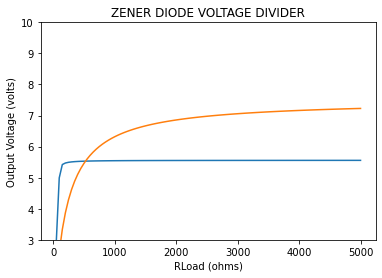

In [18]:
plt.title("ZENER DIODE VOLTAGE DIVIDER")
plt.xlabel("RLoad (ohms)")
plt.ylabel("Output Voltage (volts)")
plt.ylim(bottom=3, top=10)
VZenr = np.array(outzenr.output[::2])
VResr = np.array(outresr.output[::2])
plt.plot(np.linspace(50, 5000, num=len(VZenr)), VZenr)
plt.plot(np.linspace(50, 5000, num=len(VResr)), VResr)
plt.show()

The voltage-clamping effect of the Zener diode is evident, in contrast with the regular voltage divider. That said, there are better solutions to voltage regulation than a zener diode (**Fig 1.1.7**).

![Fig 1.1.7](Assets/AoE_1_17.png)

Let's look at parts included with the library.

In [19]:
#zenr.include(spice_library['tlc372']) 
for node in spice_library.subcircuits:
    print(node)

LMV981
irf150
d1n5919brl
1N4148
1N5822


Comparator for temperature.

![Fig 1.18](Assets/AoE_1_18.png)

What is going on here? The temperature controls the resistance of R4, which control the voltage at pin X of comparator, which, when lower than the set voltage at pin Y pulls output to ground turning on the LED.
When temperature is cool, R4 is greater than R3, voltage at X is greater than Y, LED is off. When temperature is too hot, R4 is less than R3, voltage at X drops below Y, LED comes on. Refer the table. 

| Temp | R2 | R4 | R4 ? R3 | X ? Y | OUT | LED |
|------|----|----|-------|-----|-----|-----|
| Cool | 8.06 K | 10 K | > |  > |  | OFF |
| OK | 8.06 K | 8.06 K | = | = |  | OFF | 
| Hot | 8.06 K | 6.53 K | < | < | LO | ON |

Simulation in CircuitLab:

Wiring: Search for 'opamp' and choose the model with rails. We will use this as commparator. Add a probe to the comparator's output. Remember to ground the circuit. Simulate in DC sweep mode as shown.

![Fig 1.18 Supplement](Assets/CircuitLab_1_18wiring.png)

Output: Vary R4 to simulate varying temperature conditions in the range in table. Observe the step response with the riser at R4 = R3. The lower values of R4 represent temperatures above the set point. The LED is ON during this time. The higher values of R4 represent temperatures below the set point. LED is OFF during this time.

![Fig 1.18 Supplement](Assets/CircuitLab_1_18sim.png)



TLC372 isn't among the parts in the library (above). We can add components. We need the PSPICE model as text file. Vendors like Texas Instruments make these available for download free from the web. For example:
1. The part used **Fig 1.17** is TLC372 for which the datasheet and model from TI are found [here](https://www.ti.com/product/TLC372).
2. The part used in CircuitLab model is TL081 for which the datasheet and model from TI are found [here](https://www.ti.com/product/TL081)

Download and save the file to the current directory (i.e. location of this Python script). I have changed the extension to .lib. (E.g. from 'TLC372.5_1' to 'TLC372.lib'. Use the circuit's ```include()``` method with the file to load the model. Then, include in the netlist with the ```X()``` method, passing parameters as per the interface. 

The header of the TLC372 PSPICE file is as follows:
```
* TLC372 VOLTAGE COMPARATOR "MACROMODEL" SUBCIRCUIT
* CREATED USING PARTS VERSION 4.03 ON 03/15/90 AT 16:15
* REV (N/A)
* CONNECTIONS:   NON-INVERTING INPUT
*                | INVERTING INPUT
*                | | POSITIVE POWER SUPPLY
*                | | | NEGATIVE POWER SUPPLY
*                | | | | OPEN COLLECTOR OUTPUT
*                | | | | |
.SUBCKT TLC372   1 2 3 4 5
```

This very helpfully tells us the interface to use to wire the component. The comparator needs 5 connections in the order specified: non-inverting input, inverting input, positive power supply, negative power supply, output. It also tells us that the name to use to specify the subcircuit in the netlist is 'TLC372'.

We can now proceed to include the component. I have included both TLC372 and TL081.

In [20]:
comparator = Circuit("COMPARATOR")
comparator.include("TLC372.lib")
comparator.include("TL081.lib")

comparator.V('VIN', 'input', comparator.gnd, 1@u_V)
comparator.X('OpAmp', 'TLC372', 'non_invert_in', 'invert_in', 'input', comparator.gnd, 'output')
comparator.R('R1', 'input', 'invert_in', 10@u_kOhm)
comparator.R('R2', 'invert_in', comparator.gnd, 8.06@u_kOhm)
comparator.R('R3', 'input', 'non_invert_in', 10@u_kOhm)
comparator.R('R4', 'non_invert_in', comparator.gnd, 8.06@u_kOhm)
comparator.R('RLoad', 'output', 'input', 600@u_Ohm)

print(comparator)

.title COMPARATOR
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/TLC372.lib
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/TL081.lib
VVIN input 0 1V
XOpAmp non_invert_in invert_in input 0 output TLC372
RR1 input invert_in 10kOhm
RR2 invert_in 0 8.06kOhm
RR3 input non_invert_in 10kOhm
RR4 non_invert_in 0 8.06kOhm
RRLoad output input 600Ohm



In [21]:
comsim = comparator.simulator(temperature=25, nominal_temperature=25)
outcom = comsim.dc(VVIN=slice(5, 6, 1), RR4=slice(6@u_kOhm, 10@u_kOhm, 1@u_kOhm))

for node, wave in outcom.nodes.items():
    print("{}: {}".format(node, np.array(wave)))

output: [0.11813736 0.12381577 0.11820941 0.12383918 0.21173098 0.21455731
 4.99999999 5.99999999 4.99999999 5.99999999]
xopamp.11: [0.77002856 0.77468694 0.77002688 0.7746904  0.76902238 0.7738856
 0.01799569 0.01787286 0.01780985 0.01780752]
xopamp.10: [0.77002856 0.77468694 0.77002688 0.7746904  0.76902238 0.7738856
 0.01799569 0.01787286 0.01780985 0.01780752]
xopamp.8: [0.30058954 0.23934049 0.4837766  0.4492754  0.63359936 0.63249655
 0.64597218 0.64601275 0.64603374 0.64603452]
invert_in: [2.2314507  2.67774084 2.2314507  2.67774084 2.23145072 2.67774086
 2.23145074 2.67774088 2.23145074 2.67774088]
xopamp.22: [2.9814507  3.42774084 2.9814507  3.42774084 2.98145072 3.42774086
 2.98145074 3.42774088 2.98145074 3.42774088]
non_invert_in: [1.87500002 2.25000002 2.05882355 2.47058826 2.22222223 2.66666667
 2.36842103 2.84210523 2.49999997 2.99999996]
xopamp.21: [2.62500002 3.00000002 2.80882355 3.22058826 2.97222223 3.41666667
 3.11842103 3.59210523 3.24999997 3.74999996]
xopamp.7: 

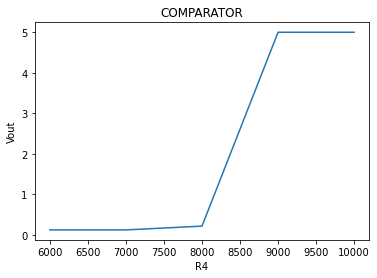

In [22]:
plt.title("COMPARATOR")
plt.xlabel("R4")
plt.ylabel("Vout")
wave = outcom.output[::2]
plt.plot(np.linspace(6000, 10000, len(wave)), wave)
plt.show()

## Signals

*Sinusoidal signals*

Time-varying signals follow patterns among which the sinusoid (**Fig 1.19**) is of particular interest.

![Fig_1_19](Assets/AoE_1_19.png)
Such a voltage is represented by the equation:
$$
V = A\:sin(2 \pi ft)
$$
or equivalently:
$$
V = A\:sin(\omega t)
$$
where:
$$
\omega = 2 \pi f
$$

It is helpful to understand this in terms of a wiper of length $A$ rotating at constant speed. The tip of the wiper traces a sinusoid in time as it moves up and down. Now, $\omega$ is the angular speed (in radians per second). The frequency $f$ is the number of cycles per second. We may want to generalize this equation by adding a term $\phi$ for phase to account for the wiper starting from an arbitrary position, not necessarily the horizontal position.

$$
V=A\;sin(\omega t + \phi)
$$

There are many time-varying signals of interest and the sinusoid is one among them. The sinusoid describes many phenomena in nature as well as the property of a class of *linear* circuits, so called because the output when driven by the sum on input signals is equal to the sum of outputs when driven by each individual signal. A little easier to wrap the head around than Bilbo Baggins' birthday quote, “I don't know half of you half as well as I should like; and I like less than half of you half as well as you deserve.”

In mathematical terms, if $O(A)$ represents the output when driven by signal $A$, then:
$$
O(A+B)=O(A)+O(B)
$$
A linear circuit driven by a sine wave always responds with a sine wave although in general, the phase and amplitude are changed.

What do we need time-varying signals for? Two primary reasons, transfer of power  and transfer of information. In the *war of the currents*, we discussed why the transmission and distribution of power over cables uses AC. The voltage supply in North America is 117 V RMS at 60 Hz, RMS being the steady voltage that yields the equivalent power as the time-varying voltage. For a sinusoid, $V_{RMS} = (\frac{1}{\sqrt{2}})A$, so that the amplitude is 165 V (or 350 V peak-peak). 

The transfer of information over air by radio also uses sinusoidal signals. A signal may be observed in a domain other than time domain, such as the frequency domain. There is wonderfully intuitive explanation of the technique of *Fourier Transform* developed by mathematician Fourier to switch between time and frequency domains in this [video](https://youtu.be/ds0cmAV-Yek) based on Doga's [blog](https://bilimneguzellan.net/fuyye-serisi/) in Turkish. It reveals the idea that a time-varying signal can be sculpted in any desired form with a collection of sinusoidal waves of differing amplitude and frequency, so that in general, information can be encoded for transmission at the transmitter and decoded at the receiver. Fourier's mathematical development gives the tools for encoding and decoding.

*Signal amplitudes and decibels*

How to compare the relative amplitude of two signals? The comparison is based on orders of magnitude of a ratio. One order of magnitude is the ratio 10:1. That is the equivalent of 1 Bel or 10 decibels. Two orders of magnitude is the ratio 100:1, that is 2 Bels or 20 dB. Note the shorthand for decibels is dB. Three orders of magnitude is the ratio 1000:1, that is 30 dB. What if the ratio is 20? Then the math works out as follows:
$$
20:1 = 2 \times 10 = 3\: dB + 10\: dB = 13\: dB 
$$
The little secret here is the ratio 2:1 is 3 dB. The formal definition of a decibel is the logarithm of the ration to base 10. Usage of decibles comes in handy as it converts multiples into addition. Per the formal definition:
$$
dB=20\:log_{10}(\frac{A_{2}}{A_{1}})
$$
where $A$ represents the amplitude of a signal. Or, equivalently: 
$$
dB=10\:log_{10}(\frac{P_{2}}{P_{1}})
$$
where $P$ represents the power in a signal.

Refer to this excellent [exposition](https://youtu.be/jNpRPX3FjtY) of decibels by Michael Ossmann of HackRF. A classic assignment consists of filling out the table of ratios and decibels as follows:

| ratio | dB |
| ---- | -- |
| 1 | 0 |
|  | 1 |
|  | 2 |
| 2 | 3 |
|  | 4 |
|  | 5 |
| 4 | 6 |
|  | 7 |
|  | 8 |
| 8 | 9 |
| 10 | 10 |
|  | 11 |

We know that ratio 1 is 0 dB since the numerator and denominator are equal which means 0 orders of magnitude. The ratio 10:1 is 1o dB as discussed. We are given that the ratio 2 is 3 dB i.e. $10 \: log_{10}(2) = 3$. We can derive the value for ratio of 4 from $2 \times 2$ which is $3\:dB+3\:dB=6\:dB$. Continuing in this way, the ratio 8 is $2 \times 2 \times 2$ which works out to $3\:dB+3\:dB+3\:dB=9\:dB$. Can we work out the rest?

Let's start with 10 dB - 9 dB = 1 dB. Subtraction of decibel-valued numbers is division of ratios. So 1 dB works out to $10 \div 8$ which is 1.25. We can use this next, as $1.25 \times 4 = 5$. Adding the decibels for the quantities on the LHS gives $1\: dB + 6\: dB = 7\: dB$. Let's update the table.

| ratio | dB |
| ---- | -- |
| 1 | 0 |
| 1.25 | 1 |
|  | 2 |
| 2 | 3 |
|  | 4 |
|  | 5 |
| 4 | 6 |
| 5 | 7 |
|  | 8 |
| 8 | 9 |
| 10 | 10 |
|  | 11 |

Now we can unlock several more. $3\: dB - 1\: dB = 2\: dB$. Using this information, we get $2 \div 1.25 = 1.6$ as the entry against 2 dB. Now, $1.25 \times 2 = 2.5$ which corresponds to $1\: dB + 3\: dB = 4\: dB$. Now using the latest results, $1.6 \times 2 = 3.2$ which corresponds to $2\: dB + 3\: dB = 5\: dB$. Updating the table, we have:

| ratio | dB |
| ---- | -- |
| 1 | 0 |
| 1.25 | 1 |
| 1.6 | 2 |
| 2 | 3 |
| 2.5 | 4 |
| 3.2 | 5 |
| 4 | 6 |
| 5 | 7 |
|  | 8 |
| 8 | 9 |
| 10 | 10 |
|  | 11 |

Note that the 3 dB approximation is reasonable but catches up as we propagate it in calculations. The table with log calculations is like so:

| ratio | dB |
| ---- | -- |
| 1 | 0 |
| 1.259 | 1 |
| 1.585 | 2 |
| 1.995 | 3 |
| 2.512 | 4 |
| 3.162 | 5 |
| 3.981 | 6 |
| 5.012 | 7 |
| 6.31 | 8 |
| 7.943 | 9 |
| 10 | 10 |
| 12.589 | 11 |

*Other signals*

Several other waveforms are shown (**Fig 1.20 through 1.24**).

![Fig 1.20](Assets/AoE_1_20.png)

![Fig 1.21-22](Assets/AoE_1_21_1_22.png)
![Fig 1.23-24](Assets/AoE_1_23_1_24.png)


**SIMULATION: VOLTAGE SOURCE**

We will simulate the following voltage sources:
1. Sawtooth: Use a piece-wise linear waveform and specify the waveform by defining the voltage values at fixed time-points. The current implementation only generates a waveform within the delineated time-window and does not repeat it. 
2. Pulse: Use the pulse generator. Specify the pulse value and duration as well as period. The duty-cycle can be adjusted thus.
3. White Noise: Use the random generator. Specify the random distribution to sample from - uniform, guassian, exponential and poisson. Each has two parameters with default value of 1st as 1 and 2nd as 0. For normal distribution, standard deviation is the 1st parameter and mean is the 2nd. Supply the duration of each random pulse.  

Classes are available for voltage or current source.

In [72]:
import PySpice.Spice.HighLevelElement;

Sawtooth = Circuit("VOLTAGE SOURCE SAWTOOTH");
Sawtooth.PieceWiseLinearVoltageSource('PWLS', '1', Sawtooth.gnd, values=[(0, 0), (10@u_ms, 5@u_V), (10.00001@u_ms, 0@u_V), (20@u_ms, 5@u_V), (20.00001@u_ms, 0@u_V)])
Sawtooth.R('RLoad', '1', Sawtooth.gnd, 100@u_Ohm);
print(Sawtooth)

.title VOLTAGE SOURCE SAWTOOTH
VPWLS 1 0 PWL(0s 0V 10ms 5V 10.00001ms 0V 20ms 5V 20.00001ms 0V)
RRLoad 1 0 100Ohm



In [73]:
sawsim = Sawtooth.simulator(temperature=25, nominal_temperature=25);
simout = sawsim.transient(step_time=1@u_ms, end_time=50@u_ms);

for nod, wav in simout.nodes.items():
    print("{}:{}".format(nod, np.array(wav))) 

2022-01-01 14:35:41,429 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: vpwls: no DC value, transient time 0 value used
1:[0.00000000e+00 2.50000000e-03 5.00000000e-03 1.00000000e-02
 2.00000000e-02 4.00000000e-02 8.00000000e-02 1.60000000e-01
 3.20000000e-01 6.40000000e-01 1.14000000e+00 1.64000000e+00
 2.14000000e+00 2.64000000e+00 3.14000000e+00 3.64000000e+00
 4.14000000e+00 4.64000000e+00 5.00000000e+00 4.50000000e+00
 3.50000000e+00 1.50000000e+00 0.00000000e+00 4.00000400e-07
 1.20000120e-06 2.80000280e-06 6.00000600e-06 1.24000124e-05
 2.52000252e-05 5.08000508e-05 1.02000102e-04 2.04400204e-04
 4.09200409e-04 8.18800819e-04 1.63800164e-03 3.27640328e-03
 6.55320655e-03 1.31068131e-02 2.62140262e-02 5.24284524e-02
 1.04857305e-01 2.09715010e-01 4.19430419e-01 8.38861239e-01
 1.33886174e+00 1.83886224e+00 2.33886274e+00 2.83886324e+00
 3.33886374e+00 3.83886424e+00 4.33886474e+00 4.83886524e+00
 5.00000000e+00 4.50000000e+00 3.50000000e+00 1.50000000e+00

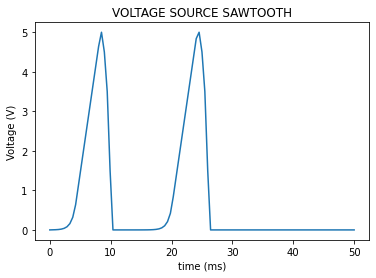

In [74]:
plt.title("VOLTAGE SOURCE SAWTOOTH")
plt.xlabel("time (ms)")
plt.ylabel("Voltage (V)")
wav = np.array(simout['1'])
plt.plot(np.linspace(start=0, stop=50, num=len(wav)), wav)
plt.show()

.title VOLTAGE SOURCE PULSE
VPWMS 1 0 DC 0V PULSE(0.5V 3.3V 0s 0s 0s 5ms 20ms)
RRLoad 1 0 100Ohm



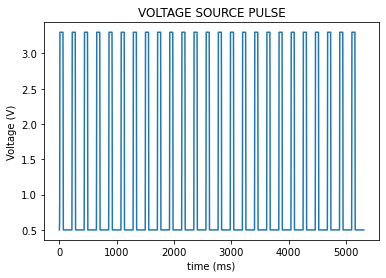

In [77]:
PWM = Circuit("VOLTAGE SOURCE PULSE")
PWM.PulseVoltageSource('PWMS', '1', PWM.gnd, initial_value=0.5@u_V, pulsed_value=3.3@u_V, 
            pulse_width=5@u_ms, period=20@u_ms )
PWM.R('RLoad', '1', PWM.gnd, 100@u_Ohm)

print(PWM)

pwmsim = PWM.simulator(temperature=25, nominal_temperature=25)
pwmout = pwmsim.transient(step_time=100@u_us, end_time=500@u_ms)

plt.title("VOLTAGE SOURCE PULSE")
plt.ylabel('Voltage (V)')
plt.xlabel('time (ms)')
plt.plot(pwmout['1'])
plt.show()



.title VOLTAGE SOURCE RANDOM
VWNS 1 0 TRRANDOM(3 150us 0s 1 0)
RRLoad 1 0 100Ohm

2022-01-01 15:13:23,356 - PySpice.Spice.NgSpice.Shared.NgSpiceShared - Shared.WARNING - Warning: vwns: no DC value, transient time 0 value used


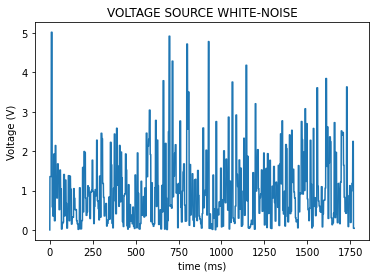

gaussian


In [78]:
RVS = Circuit("VOLTAGE SOURCE RANDOM")
WNS = RVS.RandomVoltageSource('WNS', '1', RVS.gnd, random_type='gaussian', duration=150@u_us)
RVS.R('RLoad', '1', RVS.gnd, 100@u_Ohm)

print(RVS)

wnsim = RVS.simulator(temperature=25, nominal_temperature=25)
wnout = wnsim.transient(step_time=1@u_ms, end_time=60@u_ms)

plt.title("VOLTAGE SOURCE WHITE-NOISE")
plt.ylabel("Voltage (V)")
plt.xlabel("time (ms)")
plt.plot(wnout['1'])
plt.show()

print(WNS.random_type)


Note that the waveform supports interpolation but no extrapolation as currently implemented. The parameter 'r' to repeat the waveform in the time-window from the specified time-point (i.e. r) to the last time-point in the piecewise-linear model is not yet enabled. When $r=0$ the entire waveform is repeated forever. 

**SIMULATION: REGULATED POWER SUPPLY**

Refer to the circuit from: https://youtu.be/rqppbitaQzE

![Fig X](Assets/RegulatedPowerSupply.png)

This will require using circuit devices not native to PySpice. To build and simulate a circuit with these devices, use the strategy as follows:

1. Transformer: Implement a sub-circuit. Look in examples for a class def and tweak for use.
2. Rectifier Diode: Create an NgSpice model (.lib file) from model parameters in a datasheet or from an existing LTSpice or Spice model for the part (e.g 1N4002, 1N4002G). Refer the NgSpice manual for nomenclature as the datasheet or other Spice models may use different labels.
3. Zener Diode: Create an NgSpice model for part (e.g. 1N751) as in 2. and include.

**REFERENCES**:
1. Texas Intruments has PSpice models for their products, such as [TLC372](https://www.ti.com/product/TLC372) differential comparator or [TL081](https://www.ti.com/product/TL081#tech-docs) op-amp.
2. [Diodes.com](https://www.diodes.com/design/tools/spice-models/) has Spice models for diodes of all flavor.
3. LTSpice models can be found at the [wiki](http://ltwiki.org/index.php?title=LTspiceIV-library) with directory-style drill-down.
4. NgSpice [reference](http://ngspice.sourceforge.net/docs/ngspice-manual.pdf).
5. YouTube [video](https://youtu.be/rqppbitaQzE) on which this simulation is based.
6. NgSpice has a [guide](http://ngspice.sourceforge.net/modelparams.html) to obtain models.

*Transformer*

We'll tweak the Transformer class def for an ideal transformer as follows:
1. Change coupling coefficient to 1.
2. Change winding capacitance to 0.
3. Change leakage flux and winding resistance are small values as they cannot be 0. Use 1 microhenry and 1 milliohm. 

The transformer is modeled as a pair of RLC circuits, one representing each winding.

In [26]:
from PySpice.Spice.Netlist import SubCircuitFactory

class Transformer(SubCircuitFactory):

    NAME = 'Transformer'
    NODES = ('input_plus', 'input_minus',
             'output_plus', 'output_minus')

    ##############################################

    def __init__(self,
                 turn_ratio,
                 # Original values in docs
                 # primary_inductance=1@u_H,
                 # copper_resistance=1@u_Ω,
                 # leakage_inductance=1@u_mH,
                 # winding_capacitance=20@u_pF,
                 # coupling=.999,
                 # Values recommended by engineer https://youtu.be/rqppbitaQzE
                 primary_inductance=100@u_H,
                 copper_resistance=1@u_mΩ,
                 leakage_inductance=1@u_uH,
                 winding_capacitance=0@u_pF,
                 coupling=1,
             ):

        super().__init__()

        # For an ideal transformer you can reduce the values for the flux leakage inductances, the
        # copper resistors and the winding capacitances. But
        if copper_resistance <= 0:
            raise ValueError("copper resistance must be > 0")
        if leakage_inductance <= 0:
            raise ValueError("leakage inductance must be > 0")

        # primary_turns =
        # secondary_turns =
        # turn_ratio = primary_turns / secondary_turns
        # primary_inductance =
        # primary_inductance / secondary_inductance = turn_ratio**2
        secondary_inductance = primary_inductance / float(turn_ratio**2)

        # Primary
        self.C('primary', 'input_plus', 'input_minus', winding_capacitance)
        self.L('primary_leakage', 'input_plus', 1, leakage_inductance)
        primary_inductor = self.L('primary', 1, 2, primary_inductance)
        self.R('primary', 2, 'output_minus', copper_resistance)

        # Secondary
        self.C('secondary', 'output_plus', 'output_minus', winding_capacitance)
        self.L('secondary_leakage', 'output_plus', 3, leakage_inductance)
        secondary_inductor = self.L('secondary', 3, 4, secondary_inductance)
        self.R('secondary', 4, 'output_minus', copper_resistance)

        # Coupling
        self.CoupledInductor('coupling', primary_inductor.name, secondary_inductor.name, coupling)

*Rectfier Diode*

Use 1N4002G from diodes.com under section for [Standard Rectifiers](https://www.diodes.com/assets/Spice-Models/Discrete-Prodcut-Groups/Standard-Rectifiers.txt). The approach is to wrap the model in a named subcircuit that exposes pins to interface with the outside world. The wrapper has the format:
```
.SUBCKT <SNAME> <NODE1> <NODE2> <NODE3>
...
.ENDS
```
Here, SNAME is the name by which the device shall be known. The numbered node identifiers represent the pins to make circuit connections.

Inside the wrapper, the subcircuit is defined as a netlist. It may be a netlist of only one or multiple devices. In defining the netlist, a device model is defined with the .MODEL keyword. In the example on the NgSpice [page](http://ngspice.sourceforge.net/modelparams.html), the netlist has defined a diode (symbol 'D') as 'DbodyMOD' for use in the subcircuit 'FDS86252'. The definition of 'DbodyMOD' is as follows:

```
.MODEL DbodyMOD D (IS=2.5e-12 n=1.05 RS=7e-3 TRS1=7.5e-3 TRS2=1e-6
+ CJO=0.252e-9 M=0.565 TT=1e-9 XTI=9.5)
```
This device is used in the subcircuit FDS86252 as follows:
```
Dbody 7 5 DbodyMOD
```
The scheme is:
```
.SUBCKT FDS86252 2 1 3
Dbody 7 5 DbodyMOD
...
.MODEL DbodyMOD D (IS=2.5e-12 n=1.05 RS=7e-3 TRS1=7.5e-3 TRS2=1e-6
+ CJO=0.252e-9 M=0.565 TT=1e-9 XTI=9.5)
...
.ENDS
```
Now, the subcircuit 'FDS86252' can be used as a device in a netlist with the specfied pin-out. Following ths approach, we have used the model definition for '1N4002G' from [Standard Rectifiers](https://www.diodes.com/assets/Spice-Models/Discrete-Prodcut-Groups/Standard-Rectifiers.txt) as follows:
```
.MODEL DI_1N4002G D  ( IS=65.4p RS=42.2m BV=100 IBV=5.00u
+ CJO=14.8p  M=0.333 N=1.36 TT=2.88u )
```
The netlist inside the wrapper has the following line:
```
D1 1 2 DI_1N4002G
```
**Note that the plus sign on a new line in the .lib file indicates continuation from previous line.**


*Zener diode*

Use part 1N751. Obtain the model from the [LTSpice library](http://ltwiki.org/index.php?title=LTspiceIV-library). Define the subcircuit using this model in a lib file, call it '1N751.lib'. Note that it has two pins and the order wlill determine the anode and cathode. Include and use in the circuit.

Diodes dotcom does not have part 1N751. Try another zener diode. I tried part BZT52C2V7T. The sub-circuit is available for download at the page for [BZT52C2V7T](https://www.diodes.com/part/view/BZT52C2V7T/), look under Technical Documents. Alternatively, look through the [listing](https://www.diodes.com/assets/Spice-Models/Discrete-Prodcut-Groups/Zener-Diodes.txt) for zener diodes, select one, and then copy-paste the model or sub-circuit as available.

The file 'BZT52C2V7T.lib' has named the sub-crcuit as DI_BZT52C2V7T. This will be the name to use when integrating this part in the circuit after including the lib file.

In [33]:

Regulated = Circuit("REGULATED POWER SUPPLY")
Regulated.SinusoidalVoltageSource('V', 'primary', Regulated.gnd, amplitude=165@u_V, frequency=60@u_Hz)
turn_ratio=20
Regulated.subcircuit(Transformer(turn_ratio))
Regulated.X('myTransformer', 'Transformer', 'primary', Regulated.gnd, 'secondary_plus', 'secondary_minus')

Regulated.include("1N4002G.lib")
Regulated.include("1N4002.lib")
Regulated.include("BZT52C2V7T.lib")
Regulated.include("1N751.lib")

Regulated.X('D1', '1N4002G', 'secondary_plus', 'smooth')            # 1N4002G, 1N4002
Regulated.X('D2', '1N4002G', Regulated.gnd, 'secondary_plus')       # 1N4002G, 1N4002
Regulated.X('D3', '1N4002G', Regulated.gnd, 'secondary_minus')      # 1N4002G, 1N4002
Regulated.X('D4', '1N4002G', 'secondary_minus', 'smooth')           # 1N4002G, 1N4002
Regulated.R('RS', 'smooth', 'output', 100@u_Ohm)
Regulated.C('C', 'smooth', Regulated.gnd, 1@u_mF)
Regulated.X('DZ', '1N751', Regulated.gnd, 'output')                 # DI_BZT52C2V7T, 1N751
Regulated.R('Load', 'output', Regulated.gnd, 1@u_kOhm)

print(Regulated)


.title REGULATED POWER SUPPLY
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/1N4002G.lib
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/1N4002.lib
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/BZT52C2V7T.lib
.include /Users/sanjaybhatikar/Desktop/ArtofElectronics/1N751.lib
.subckt Transformer input_plus input_minus output_plus output_minus
Cprimary input_plus input_minus 0pF
Lprimary_leakage input_plus 1 1uH
Lprimary 1 2 100H
Rprimary 2 output_minus 1mOhm
Csecondary output_plus output_minus 0pF
Lsecondary_leakage output_plus 3 1uH
Lsecondary 3 4 0.25H
Rsecondary 4 output_minus 1mOhm
Kcoupling Lprimary Lsecondary 1
.ends Transformer
VV primary 0 DC 0V AC 1V SIN(0V 165V 60Hz 0s 0Hz)
XmyTransformer primary 0 secondary_plus secondary_minus Transformer
XD1 secondary_plus smooth 1N4002G
XD2 0 secondary_plus 1N4002G
XD3 0 secondary_minus 1N4002G
XD4 secondary_minus smooth 1N4002G
RRS smooth output 100Ohm
CC smooth 0 1mF
XDZ 0 output 1N751
RLoad output 0 1kOhm



In [39]:
regsim = Regulated.simulator(temperature=25, nominal_temperature=25)
regout = regsim.transient(step_time=1@u_us, end_time=60@u_ms)

for nod, wav in regout.nodes.items():
    print("{}:{}".format(nod, np.array(wav)))


output:[6.78281981e-23 3.89860994e-15 3.92453760e-15 ... 5.08505394e+00
 5.08505359e+00 5.08505335e+00]
smooth:[6.75273690e-23 1.04681711e-14 1.10038429e-14 ... 6.90502233e+00
 6.90500997e+00 6.90500133e+00]
xmytransformer.4:[ 8.93135200e-31 -1.34344115e-05 -1.41217394e-05 ...  7.54493137e+00
  7.54491273e+00  7.54489968e+00]
xmytransformer.3:[8.93135200e-31 1.83286060e-05 1.91902895e-05 ... 2.32272958e+00
 2.32019478e+00 2.31842617e+00]
secondary_plus:[8.93251173e-31 1.41414643e-05 1.48649663e-05 ... 2.32272954e+00
 2.32019481e+00 2.31842614e+00]
secondary_minus:[ 4.72324689e-30 -1.34343696e-05 -1.41216954e-05 ...  7.54493137e+00
  7.54491273e+00  7.54489968e+00]
xmytransformer.2:[-9.06994368e-35 -1.34343675e-05 -1.41216932e-05 ...  7.54493721e+00
  7.54491856e+00  7.54490551e+00]
xmytransformer.1:[-9.06994368e-35  6.21825982e-04  6.52118884e-04 ... -9.68990991e+01
 -9.69494403e+01 -9.69845651e+01]
primary:[ 0.00000000e+00  6.22035345e-04  6.52335157e-04 ... -9.68991006e+01
 -9.694944

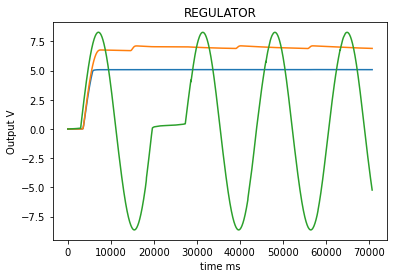

In [40]:
plt.title('REGULATOR')
plt.xlabel("time ms")
plt.ylabel("Output V")
plt.plot(regout['output'])
plt.plot(regout['smooth'])
plt.plot(regout['secondary_plus']-regout['secondary_minus'])
plt.show()

## Capacitors and ac circuits

## Inductors and transformers

## Impedance and reactance

## Diodes and diode circuit

## Other passive components

## Reference